# Relax Inc

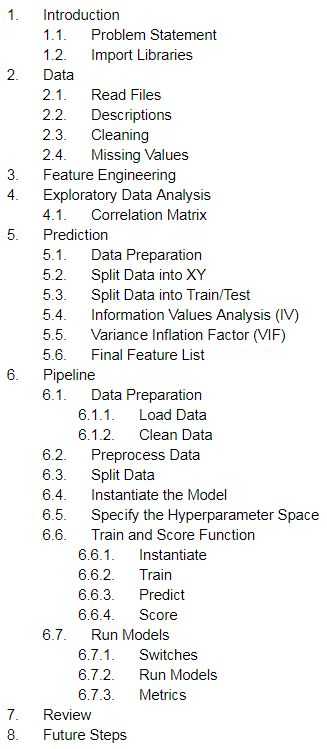

In [1]:
# outline picture
from IPython.display import Image
Image(filename='project_outline_2019_05_22.jpg')

# 1) Introduction

## 1.1) Problem Statement

12,000 users signed up for a product in the last two years. The user table describes each user across 9 features. The engagement table details when each user signed at a certain day and time. An adopted user is defined as a user who has logged into the product on three separate days in at least one seven day period. Once the user is identified as adopted or not, indentify which features predict user adoption.

## 1.2) Import Libraries

In [2]:
# libraries

import chardet # check encoding for csv file

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# 2) Data

## 2.1) Read Files

### 2.1.1) takehome_users

In [3]:
# check encoding for csv file
with open('takehome_users.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
# read file
tu_raw = pd.read_csv('takehome_users.csv', 
                 index_col=0, 
                 encoding=result['encoding'])

# copy the df to edit
tu = tu_raw.copy()

tu.head(10)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN


In [4]:
tu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 937.5+ KB


In [5]:
tu.describe()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


### 2.1.2) takehome_user_engagement

In [6]:
# check encoding for csv file
with open('takehome_user_engagement.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
# read file
tue_raw = pd.read_csv('takehome_user_engagement.csv', 
                 index_col=0, # set time_stamp col to index later
                 encoding=result['encoding'])

# copy the df to edit
tue = tue_raw.copy()

tue.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [7]:
tue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
user_id    207917 non-null int64
visited    207917 non-null int64
dtypes: int64(2)
memory usage: 4.8+ MB


In [8]:
tue.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


## 2.2) Descriptions

### 2.2.1) takehome_users

- object_id:   the  user's  id
- creation_time:  when  they  created  their  account
- name:  the  user's  name
- email:  email  address
- creation_source:   how  their  account  was  created.  This  takes  on  one of  5  values:
    - PERSONAL_PROJECTS:  invited  to  join  another  user's personal  workspace
    - GUEST_INVITE:  invited  to  an  organization  as  a  guest (limited  permissions)
    - ORG_INVITE:  invited  to  an  organization  (as  a  full  member)
    - SIGNUP:  signed  up  via  the  website
    - SIGNUP_GOOGLE_AUTH:  signed  up  using  Google Authentication  (using  a  Google  email  account  for  their  login id)
- last_session_creation_time:   unix  timestamp  of  last  login
- opted_in_to_mailing_list:  whether  they  have  opted  into  receiving marketing  emails
- enabled_for_marketing_drip: whether  they  are  on  the  regular marketing  email  drip
- org_id:   the  organization  (group  of  users)  they  belong  to
- invited_by_user_id:   which  user  invited  them  to  join  (if  applicable).

### 2.2.2) takehome_user_engagement

- time_stamp: the date and time the user logged in
- user_id: the user's id
- visited: 1 for visited, 0 for not visited

## 2.3) Cleaning

### 2.3.1) takehome_users

In [9]:
# rename index name
tu.index.names = ['user_id']

In [10]:
# convert date columns to datetime
tu['creation_time'] = pd.to_datetime(tu['creation_time'])

# convert unix timestamp to datetime
tu['last_session_creation_time'] = pd.to_datetime(tu['last_session_creation_time'],unit='s')

In [11]:
# convert columns to category format

tu['creation_source'] = pd.Categorical(tu['creation_source'])
tu['opted_in_to_mailing_list'] = pd.Categorical(tu['opted_in_to_mailing_list'])
tu['enabled_for_marketing_drip'] = pd.Categorical(tu['enabled_for_marketing_drip'])
tu['org_id'] = pd.Categorical(tu['org_id'])

In [12]:
tu.head(10)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
user_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN


In [13]:
tu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null category
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null category
enabled_for_marketing_drip    12000 non-null category
org_id                        12000 non-null category
invited_by_user_id            6417 non-null float64
dtypes: category(4), datetime64[ns](2), float64(1), object(2)
memory usage: 644.7+ KB


### 2.3.2) takehome_user_engagement

In [14]:
# convert columns to datetime
tue.index = pd.to_datetime(tue.index)

In [15]:
# convert columns to category format
tue['visited'] = pd.Categorical(tue['visited'])

In [16]:
tue.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [17]:
tue.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
user_id    207917 non-null int64
visited    207917 non-null category
dtypes: category(1), int64(1)
memory usage: 3.4 MB


## 2.4) Missing Values

### 2.4.1) takehome_users

In [18]:
# list all columns with missing values
tu_miss = tu.columns[tu.isna().any()].tolist()
tu_miss

['last_session_creation_time', 'invited_by_user_id']

In [19]:
# show example of columns with missing values
tu[tu_miss].head(10)

,last_session_creation_time,invited_by_user_id
user_id,,
1,2014-04-22 03:53:30,10803.0
2,2014-03-31 03:45:04,316.0
3,2013-03-19 23:14:52,1525.0
4,2013-05-22 08:09:28,5151.0
5,2013-01-22 10:14:20,5240.0
6,2013-12-19 03:37:06,11241.0
7,2012-12-20 13:24:32,NaN
8,NaT,NaN
9,NaT,NaN


In [20]:
# handle/address missing values
# last_session_creation_time
# NaT = the user signed up but never signed in

ls_nat_num = tu['last_session_creation_time'].isna().sum()
ls_nat_perc = ls_nat_num / tu.shape[0]
ls_remain = tu.shape[0] - ls_nat_num

print('Column: Last Session Creation Time')
print('Number of NaT values:', ls_nat_num)
print('Percent of NaT values:', ls_nat_perc*100,'%')
print('Number of Remaining Values:',ls_remain)

# drop rows with NaT values
tu = tu.dropna(subset=['last_session_creation_time'])
print('Verified Remaining Values:', tu.shape)

Column: Last Session Creation Time
Number of NaT values: 3177
Percent of NaT values: 26.475 %
Number of Remaining Values: 8823
Verified Remaining Values: (8823, 9)


In [21]:
# handle/address missing values
# invited_by_user_id 

# NaN = the user wasn't invited by another user

# set NaN value to 0
tu['invited_by_user_id'].fillna(0, inplace=True)

# convert float to int
tu['invited_by_user_id'] = tu['invited_by_user_id'].astype(int) 

tu.head(10)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
user_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,0
10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143
11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,2013-12-27 03:55:54,0,0,69,0


In [22]:
tu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 9 columns):
creation_time                 8823 non-null datetime64[ns]
name                          8823 non-null object
email                         8823 non-null object
creation_source               8823 non-null category
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      8823 non-null category
enabled_for_marketing_drip    8823 non-null category
org_id                        8823 non-null category
invited_by_user_id            8823 non-null int32
dtypes: category(4), datetime64[ns](2), int32(1), object(2)
memory usage: 445.8+ KB


### 2.4.2) takehome_user_engagement

In [23]:
# handle/address missing values
# list all columns with missing values
tue_miss = tue.columns[tue.isna().any()].tolist()

if(len(tue_miss) == 0):
    print ('There are no missing values')
else:
    print(tue_miss)

There are no missing values


# 3) Feature Engineering

## 3.1) takehome_users

- object_id: NONE
- creation_time: year, month, day, day of the week, weekday/weekend, etc.
- name: NONE
- email: host (gmail, yahoo, etc.)
- creation_source: NONE
- last_session_creation_time: year, month, day, day of the week, weekday/weekend, etc.
- opted_in_to_mailing_list: NONE
- enabled_for_marketing_drip: NONE
- org_id: NONE
- invited_by_user_id: invited vs. not invited

### 3.1.1) Creation Time

In [24]:
# creation_time: year, month, day, day of the week, weekday/weekend, etc.

tu['ct_year'] = pd.DatetimeIndex(tu['creation_time']).year
tu['ct_month'] = pd.DatetimeIndex(tu['creation_time']).month
tu['ct_day'] = pd.DatetimeIndex(tu['creation_time']).day
tu['ct_dow'] = tu['creation_time'].dt.dayofweek # Monday = 0 & Sunday = 6
tu['ct_we'] = np.where(tu['ct_dow']==5 , 1, 
                       np.where(tu['ct_dow']==6 , 1, 
                                np.where(tu['ct_dow'].isnull(), np.NaN, 0))) # weekend = 1, weekday = 0, NaN = NaN
tu['ct_we'] = tu['ct_we'].astype(int) # convert column from float to int


tu[['creation_time', 'ct_year', 'ct_month', 'ct_day', 'ct_dow', 'ct_we']].head(10)

,creation_time,ct_year,ct_month,ct_day,ct_dow,ct_we
user_id,,,,,,
1,2014-04-22 03:53:30,2014,4,22,1,0
2,2013-11-15 03:45:04,2013,11,15,4,0
3,2013-03-19 23:14:52,2013,3,19,1,0
4,2013-05-21 08:09:28,2013,5,21,1,0
5,2013-01-17 10:14:20,2013,1,17,3,0
6,2013-12-17 03:37:06,2013,12,17,1,0
7,2012-12-16 13:24:32,2012,12,16,6,1
10,2013-01-16 22:08:03,2013,1,16,2,0
11,2013-12-26 03:55:54,2013,12,26,3,0


In [25]:
tu['ct_we'].unique()

array([0, 1], dtype=int64)

### 3.1.2) Email

In [26]:
# extract host string from email column
tu['email_host'] = tu['email'].str.split('@').str.get(1)

# convert column to category format
tu['email_host'] = pd.Categorical(tu['email_host'])

tu[['email','email_host']].head()

,email,email_host
user_id,,
1,AugustCClausen@yahoo.com,yahoo.com
2,MatthewPoole@gustr.com,gustr.com
3,MitchellBottrill@gustr.com,gustr.com
4,NicklasSClausen@yahoo.com,yahoo.com
5,GraceRaw@yahoo.com,yahoo.com


In [27]:
# how many email_host categories
print('Number of Email Hosts:',len(tu['email_host'].cat.categories.tolist()))

Number of Email Hosts: 812


In [28]:
# examine email_host categories

# print top 10 categories in email_host
print('Top Ten Categories:')
print(tu['email_host'].value_counts().head(10))
print('')


# create list of categories
email_host_rank = tu['email_host'].value_counts().index.tolist()

# create list of top 6
email_host_top_six = email_host_rank[:6]

# create list to replace with 'other'
email_host_replace = email_host_rank[6:]

print('Top Six Categories:', email_host_top_six)
print('Number of Categories to be Replaced:', len(email_host_replace))

Top Ten Categories:
gmail.com         2930
yahoo.com         1726
jourrapide.com     883
gustr.com          842
cuvox.de           828
hotmail.com        803
oqpze.com            2
mumdc.com            2
luque.com            2
xvnbr.com            2
Name: email_host, dtype: int64

Top Six Categories: ['gmail.com', 'yahoo.com', 'jourrapide.com', 'gustr.com', 'cuvox.de', 'hotmail.com']
Number of Categories to be Replaced: 806


In [29]:
# create 'other' category for remaining email hosts

# add new category
tu['email_host'] = tu['email_host'].cat.add_categories(['other'])

# replace the rest of the categories with 'other'
tu['email_host'] = tu['email_host'].replace(email_host_replace, 'other')

# remove unused categories
tu['email_host'] = tu['email_host'].cat.remove_unused_categories()
print('Remaining Categories:')
print(tu['email_host'].value_counts())

Remaining Categories:
gmail.com         2930
yahoo.com         1726
jourrapide.com     883
gustr.com          842
cuvox.de           828
other              811
hotmail.com        803
Name: email_host, dtype: int64


In [30]:
tu[['email','email_host']].head(15)

,email,email_host
user_id,,
1,AugustCClausen@yahoo.com,yahoo.com
2,MatthewPoole@gustr.com,gustr.com
3,MitchellBottrill@gustr.com,gustr.com
4,NicklasSClausen@yahoo.com,yahoo.com
5,GraceRaw@yahoo.com,yahoo.com
6,EduardoPereiraCunha@yahoo.com,yahoo.com
7,TylerSewell@jourrapide.com,jourrapide.com
10,CarlaFerreiraSantos@gustr.com,gustr.com
11,MaltheAPaulsen@gustr.com,gustr.com


### 3.1.3) Last Session Creation Time

In [31]:
# last_session_creation_time: year, month, day, day of the week, weekday/weekend, etc.

tu['ls_year'] = pd.DatetimeIndex(tu['last_session_creation_time']).year
tu['ls_month'] = pd.DatetimeIndex(tu['last_session_creation_time']).month
tu['ls_day'] = pd.DatetimeIndex(tu['last_session_creation_time']).day
tu['ls_dow'] = tu['last_session_creation_time'].dt.dayofweek # Monday = 0 & Sunday = 6
tu['ls_we'] = np.where(tu['ls_dow']==5 , 1, 
                       np.where(tu['ls_dow']==6 , 1, 
                                np.where(tu['ls_dow'].isnull(), np.NaN, 0))) # weekend = 1, weekday = 0, NaN = NaN
tu['ls_we'] = tu['ls_we'].astype(int) # convert column from float to int

tu[['last_session_creation_time', 'ls_year', 'ls_month', 'ls_day', 'ls_dow', 'ls_we']].head(15)

,last_session_creation_time,ls_year,ls_month,ls_day,ls_dow,ls_we
user_id,,,,,,
1,2014-04-22 03:53:30,2014,4,22,1,0
2,2014-03-31 03:45:04,2014,3,31,0,0
3,2013-03-19 23:14:52,2013,3,19,1,0
4,2013-05-22 08:09:28,2013,5,22,2,0
5,2013-01-22 10:14:20,2013,1,22,1,0
6,2013-12-19 03:37:06,2013,12,19,3,0
7,2012-12-20 13:24:32,2012,12,20,3,0
10,2014-06-03 22:08:03,2014,6,3,1,0
11,2013-12-27 03:55:54,2013,12,27,4,0


In [32]:
tu['ls_we'].unique()

array([0, 1], dtype=int64)

### 3.1.4) Invited By User ID

In [33]:
# invited vs. not invited
# 1 = invited, 0 = not invited
tu['invited'] = np.where(tu['invited_by_user_id']==0, 0, 1)

# convert column to category format
tu['invited'] = pd.Categorical(tu['invited'])

tu[['invited_by_user_id','invited']].head(10)

,invited_by_user_id,invited
user_id,,
1,10803,1
2,316,1
3,1525,1
4,5151,1
5,5240,1
6,11241,1
7,0,0
10,4143,1
11,0,0


### 3.1.5) TU DataFrame after Feature Engineering

In [34]:
# entire tu df after feature engineering
tu.head(10)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ct_year,...,ct_day,ct_dow,ct_we,email_host,ls_year,ls_month,ls_day,ls_dow,ls_we,invited
user_id,,,,,,,,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,2014,...,22,1,0,yahoo.com,2014,4,22,1,0,1
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,2013,...,15,4,0,gustr.com,2014,3,31,0,0,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,2013,...,19,1,0,gustr.com,2013,3,19,1,0,1
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,2013,...,21,1,0,yahoo.com,2013,5,22,2,0,1
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,2013,...,17,3,0,yahoo.com,2013,1,22,1,0,1
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241,2013,...,17,1,0,yahoo.com,2013,12,19,3,0,1
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,0,2012,...,16,6,1,jourrapide.com,2012,12,20,3,0,0
10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143,2013,...,16,2,0,gustr.com,2014,6,3,1,0,1
11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,2013-12-27 03:55:54,0,0,69,0,2013,...,26,3,0,gustr.com,2013,12,27,4,0,0


In [35]:
# tu df after feature engineering
tu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 21 columns):
creation_time                 8823 non-null datetime64[ns]
name                          8823 non-null object
email                         8823 non-null object
creation_source               8823 non-null category
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      8823 non-null category
enabled_for_marketing_drip    8823 non-null category
org_id                        8823 non-null category
invited_by_user_id            8823 non-null int32
ct_year                       8823 non-null int64
ct_month                      8823 non-null int64
ct_day                        8823 non-null int64
ct_dow                        8823 non-null int64
ct_we                         8823 non-null int32
email_host                    8823 non-null category
ls_year                       8823 non-null int64
ls_month                      8823 non-null int64
ls_day 

## 3.2) takehome_user_engagement

In [36]:
tue.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [37]:
# adjust df to be used for 'adopted_user' feature

# convert index into column
tue.reset_index(level=0, inplace=True)

# keep only 2 columns, reorder and sort columns
tue = tue[['user_id', 'time_stamp']].sort_values(by=['user_id', 'time_stamp'])

# strip the time from the column
tue['time_stamp'] = tue['time_stamp'].dt.date

# rename column
tue = tue.rename(columns={"time_stamp": "login_date"})

# drop duplicate logins (multiple logins on the same day)
tue = tue.drop_duplicates()

In [38]:
tue.head(20)

,user_id,login_date
0,1,2014-04-22
1,2,2013-11-15
2,2,2013-11-29
3,2,2013-12-09
4,2,2013-12-25
5,2,2013-12-31
6,2,2014-01-08
7,2,2014-02-03
8,2,2014-02-08
9,2,2014-02-09


In [39]:
tue.tail(20)

,user_id,login_date
207897,11988,2014-05-21
207898,11988,2014-05-23
207899,11988,2014-05-24
207900,11988,2014-05-26
207901,11988,2014-05-27
207902,11988,2014-06-01
207903,11989,2013-09-07
207904,11990,2013-07-06
207905,11991,2014-04-20
207906,11991,2014-04-25


### 3.2.1) Adopted User
An adopted user is defined as a user who has logged into the product on three separate days in at least one seven day period. 

In [40]:
# create a custom function to aggregate the users

def adopt_func(a):
    '''
    1) check how many times the user logged in
    2) if # of logins >= 3, then calculate if any set of the 3 consecutive logins 
        happened on different days in a 7 day window    
    '''
    
    min_logins = 3
    max_day_range = 7

    #print('new user')
    
    # check if num of logins > min_logings
    if len(a) >= min_logins: 
        #print('logins >= 3')
        b = [i for i in a]  # convert property object to list
        b.sort() # sort the dates
        c = [b[i+1] - b[i] for i in range(len(b)-1)] # count the number of days between each pair of logins
        d = [c[i] + c[i+1] for i in range(len(c)-1)] # count the total number of days between 3 consecutive logins
        
        # check if the min delta for 3 consecutive logins is <= max_day_range
        if (min(d) <= timedelta(days=max_day_range)):
            #print('within 7 days')
            return 1
        else:
            #print('not within 7 days')
            return 0
    else:
        #print('logins < 3')
        return 0


In [41]:
# use groupby to categorize users into adopted users or not

# group by user_id and aggregate using custom function
tue_agg = tue.groupby('user_id').agg(adopt_func)

# rename columns
tue_agg.columns = ['adopted_user']

# convert column to category format
tue_agg['adopted_user'] = pd.Categorical(tue_agg['adopted_user'])


In [42]:
tue_agg.head()

,adopted_user
user_id,
1,0
2,1
3,0
4,0
5,0


### 3.3) TU Combined (tu_comb = tu + tue)

In [43]:
# combine tu and tue_agg tables by user_id
tu_comb = tu.merge(tue_agg, on='user_id')

tu_comb.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ct_year,...,ct_dow,ct_we,email_host,ls_year,ls_month,ls_day,ls_dow,ls_we,invited,adopted_user
user_id,,,,,,,,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,2014,...,1,0,yahoo.com,2014,4,22,1,0,1,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,2013,...,4,0,gustr.com,2014,3,31,0,0,1,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,2013,...,1,0,gustr.com,2013,3,19,1,0,1,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,2013,...,1,0,yahoo.com,2013,5,22,2,0,1,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,2013,...,3,0,yahoo.com,2013,1,22,1,0,1,0


In [44]:
tu_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 22 columns):
creation_time                 8823 non-null datetime64[ns]
name                          8823 non-null object
email                         8823 non-null object
creation_source               8823 non-null category
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      8823 non-null category
enabled_for_marketing_drip    8823 non-null category
org_id                        8823 non-null category
invited_by_user_id            8823 non-null int32
ct_year                       8823 non-null int64
ct_month                      8823 non-null int64
ct_day                        8823 non-null int64
ct_dow                        8823 non-null int64
ct_we                         8823 non-null int32
email_host                    8823 non-null category
ls_year                       8823 non-null int64
ls_month                      8823 non-null int64
ls_day 

# 4) Exploratory Data Analysis

## 4.1) Correlation Matrix

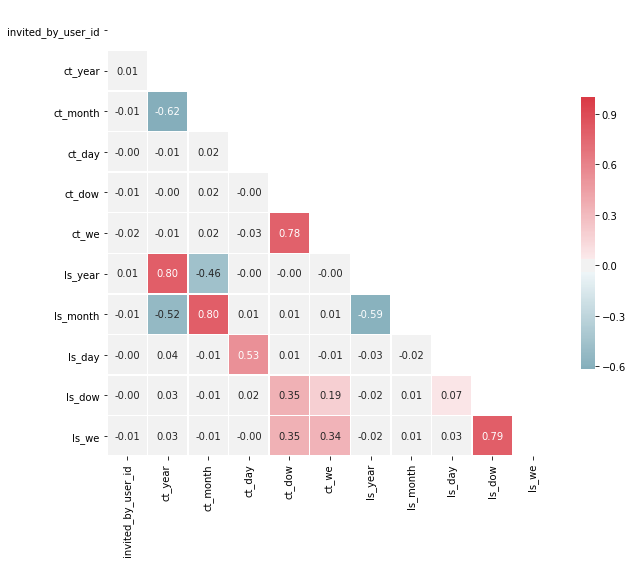

In [45]:
# Compute the correlation matrix
corr = tu_comb.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')


## 4.2) Creation Source vs. Adopted User

In [46]:
# data neccesary for this section
cs_au = tu_comb.copy()[['creation_source','adopted_user']]

In [47]:
# count num of users per category
cs_au['creation_source'].value_counts()

ORG_INVITE            3188
SIGNUP                1898
GUEST_INVITE          1588
SIGNUP_GOOGLE_AUTH    1385
PERSONAL_PROJECTS      764
Name: creation_source, dtype: int64

In [48]:
# count num of users per category
cs_au['adopted_user'].value_counts()

0    7167
1    1656
Name: adopted_user, dtype: int64

In [49]:
# create pivot table to compare categories
cs_au_totals = pd.pivot_table(cs_au, index=['creation_source'], columns=['adopted_user'], aggfunc=len)
cs_au_totals

adopted_user,0,1
creation_source,,
GUEST_INVITE,1219,369
ORG_INVITE,2614,574
SIGNUP,1596,302
PERSONAL_PROJECTS,592,172
SIGNUP_GOOGLE_AUTH,1146,239


In [50]:
# convert table into percentages
cols = cs_au_totals.columns
cs_au_perc = cs_au_totals[cols].div(cs_au_totals[cols].sum(axis=1), axis=0).multiply(100).round(1)
cs_au_perc

adopted_user,0,1
creation_source,,
GUEST_INVITE,76.8,23.2
ORG_INVITE,82.0,18.0
SIGNUP,84.1,15.9
PERSONAL_PROJECTS,77.5,22.5
SIGNUP_GOOGLE_AUTH,82.7,17.3


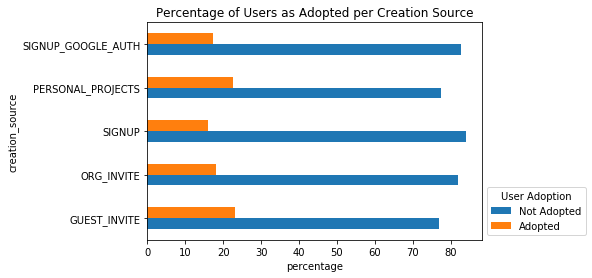

In [51]:
# compare creation_source to adopted_user

_ = cs_au_perc.plot(kind='barh')
_ = plt.xlabel('percentage')
_ = plt.title('Percentage of Users as Adopted per Creation Source')
_ = plt.legend(['Not Adopted', 'Adopted'], 
               title='User Adoption', 
               loc='lower left', 
               bbox_to_anchor=(1,0))


Distinction between adopted and not adopted isn't highly correlated with the Creation Source.

## 4.3) Email Host vs. Adopted User

In [52]:
# data neccesary for this section
eh_au = tu_comb.copy()[['email_host','adopted_user']]

In [53]:
# count num of users per category
eh_au['email_host'].value_counts()

gmail.com         2930
yahoo.com         1726
jourrapide.com     883
gustr.com          842
cuvox.de           828
other              811
hotmail.com        803
Name: email_host, dtype: int64

In [54]:
# count num of users per category
eh_au['adopted_user'].value_counts()

0    7167
1    1656
Name: adopted_user, dtype: int64

In [55]:
# create pivot table to compare categories

eh_au_totals = pd.pivot_table(eh_au, index=['email_host'], columns=['adopted_user'], aggfunc=len)
eh_au_totals

adopted_user,0,1
email_host,,
yahoo.com,1459,267
gustr.com,692,150
jourrapide.com,713,170
cuvox.de,684,144
gmail.com,2373,557
other,648,163
hotmail.com,598,205


In [56]:
# convert table into percentages

cols = eh_au_totals.columns
eh_au_perc = eh_au_totals[cols].div(eh_au_totals[cols].sum(axis=1), axis=0).multiply(100).round(1)
eh_au_perc

adopted_user,0,1
email_host,,
yahoo.com,84.5,15.5
gustr.com,82.2,17.8
jourrapide.com,80.7,19.3
cuvox.de,82.6,17.4
gmail.com,81.0,19.0
other,79.9,20.1
hotmail.com,74.5,25.5


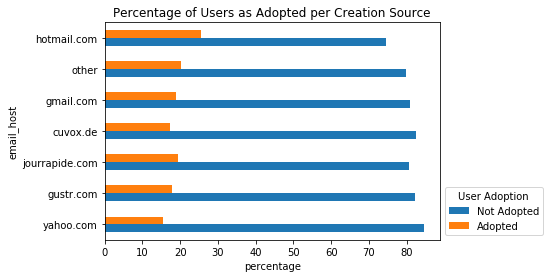

In [57]:
# compare creation_source to adopted_user

_ = eh_au_perc.plot(kind='barh')
_ = plt.xlabel('percentage')
_ = plt.title('Percentage of Users as Adopted per Creation Source')
_ = plt.legend(['Not Adopted', 'Adopted'], 
               title='User Adoption', 
               loc='lower left', 
               bbox_to_anchor=(1,0))

Distinction between adopted and not adopted isn't highly correlated with the email host.

In [58]:
tu_comb.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ct_year,...,ct_dow,ct_we,email_host,ls_year,ls_month,ls_day,ls_dow,ls_we,invited,adopted_user
user_id,,,,,,,,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,2014,...,1,0,yahoo.com,2014,4,22,1,0,1,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,2013,...,4,0,gustr.com,2014,3,31,0,0,1,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,2013,...,1,0,gustr.com,2013,3,19,1,0,1,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,2013,...,1,0,yahoo.com,2013,5,22,2,0,1,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,2013,...,3,0,yahoo.com,2013,1,22,1,0,1,0


# 5) Prediction

## 5.1) Data Preperation

In [59]:
df = tu_comb.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 22 columns):
creation_time                 8823 non-null datetime64[ns]
name                          8823 non-null object
email                         8823 non-null object
creation_source               8823 non-null category
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      8823 non-null category
enabled_for_marketing_drip    8823 non-null category
org_id                        8823 non-null category
invited_by_user_id            8823 non-null int32
ct_year                       8823 non-null int64
ct_month                      8823 non-null int64
ct_day                        8823 non-null int64
ct_dow                        8823 non-null int64
ct_we                         8823 non-null int32
email_host                    8823 non-null category
ls_year                       8823 non-null int64
ls_month                      8823 non-null int64
ls_day 

In [60]:
# drop object and datetime columns
df.drop(df.select_dtypes(['object']), inplace=True, axis=1)
df.drop(df.select_dtypes(['datetime']), inplace=True, axis=1)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 18 columns):
creation_source               8823 non-null category
opted_in_to_mailing_list      8823 non-null category
enabled_for_marketing_drip    8823 non-null category
org_id                        8823 non-null category
invited_by_user_id            8823 non-null int32
ct_year                       8823 non-null int64
ct_month                      8823 non-null int64
ct_day                        8823 non-null int64
ct_dow                        8823 non-null int64
ct_we                         8823 non-null int32
email_host                    8823 non-null category
ls_year                       8823 non-null int64
ls_month                      8823 non-null int64
ls_day                        8823 non-null int64
ls_dow                        8823 non-null int64
ls_we                         8823 non-null int32
invited                       8823 non-null category
adopted_user            

In [62]:
df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ct_year,ct_month,ct_day,ct_dow,ct_we,email_host,ls_year,ls_month,ls_day,ls_dow,ls_we,invited,adopted_user
user_id,,,,,,,,,,,,,,,,,,
1,GUEST_INVITE,1,0,11,10803,2014,4,22,1,0,yahoo.com,2014,4,22,1,0,1,0
2,ORG_INVITE,0,0,1,316,2013,11,15,4,0,gustr.com,2014,3,31,0,0,1,1
3,ORG_INVITE,0,0,94,1525,2013,3,19,1,0,gustr.com,2013,3,19,1,0,1,0
4,GUEST_INVITE,0,0,1,5151,2013,5,21,1,0,yahoo.com,2013,5,22,2,0,1,0
5,GUEST_INVITE,0,0,193,5240,2013,1,17,3,0,yahoo.com,2013,1,22,1,0,1,0


In [63]:
# convert categorical columns to integers

# select categorical columns
cat_cols = ['creation_source', 'email_host']

df[cat_cols] = df[cat_cols].apply(lambda x: x.cat.codes)

In [64]:
# final dataframe to be modeled with all numerical values
df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ct_year,ct_month,ct_day,ct_dow,ct_we,email_host,ls_year,ls_month,ls_day,ls_dow,ls_we,invited,adopted_user
user_id,,,,,,,,,,,,,,,,,,
1,0,1,0,11,10803,2014,4,22,1,0,5,2014,4,22,1,0,1,0
2,1,0,0,1,316,2013,11,15,4,0,2,2014,3,31,0,0,1,1
3,1,0,0,94,1525,2013,3,19,1,0,2,2013,3,19,1,0,1,0
4,0,0,0,1,5151,2013,5,21,1,0,5,2013,5,22,2,0,1,0
5,0,0,0,193,5240,2013,1,17,3,0,5,2013,1,22,1,0,1,0


## 5.2) Split Data Into XY

In [65]:
# create X

# remove the column for Y
X = df.drop(['adopted_user'], axis=1)

X.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ct_year,ct_month,ct_day,ct_dow,ct_we,email_host,ls_year,ls_month,ls_day,ls_dow,ls_we,invited
user_id,,,,,,,,,,,,,,,,,
1,0,1,0,11,10803,2014,4,22,1,0,5,2014,4,22,1,0,1
2,1,0,0,1,316,2013,11,15,4,0,2,2014,3,31,0,0,1
3,1,0,0,94,1525,2013,3,19,1,0,2,2013,3,19,1,0,1
4,0,0,0,1,5151,2013,5,21,1,0,5,2013,5,22,2,0,1
5,0,0,0,193,5240,2013,1,17,3,0,5,2013,1,22,1,0,1


In [66]:
# create y

y = df['adopted_user']
y.head()

user_id
1    0
2    1
3    0
4    0
5    0
Name: adopted_user, dtype: category
Categories (2, int64): [0, 1]

## 5.3) Split Data into Train/Test

In [67]:
# split df into train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [68]:
X_train.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ct_year,ct_month,ct_day,ct_dow,ct_we,email_host,ls_year,ls_month,ls_day,ls_dow,ls_we,invited
user_id,,,,,,,,,,,,,,,,,
6860,3,1,0,201,0,2014,5,30,4,0,5,2014,5,30,4,0,0
5386,1,0,0,56,5386,2012,7,2,0,0,4,2014,6,1,6,1,1
2750,1,0,0,0,10289,2014,3,18,1,0,5,2014,6,4,2,0,1
6647,4,1,1,52,0,2012,7,27,4,0,1,2012,7,27,4,0,0
6630,3,0,0,136,0,2013,4,7,6,1,6,2013,4,7,6,1,0


In [69]:
X_test.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ct_year,ct_month,ct_day,ct_dow,ct_we,email_host,ls_year,ls_month,ls_day,ls_dow,ls_we,invited
user_id,,,,,,,,,,,,,,,,,
2388,1,0,0,291,5101,2013,9,2,0,0,3,2013,9,2,0,0,1
10146,3,0,0,200,0,2014,4,17,3,0,0,2014,5,6,1,0,0
7301,4,1,0,369,0,2014,3,17,0,0,1,2014,5,27,1,0,0
6108,2,0,1,154,0,2013,12,16,0,0,2,2014,5,30,4,0,0
295,4,0,0,121,0,2012,10,10,2,0,1,2012,10,17,2,0,0


In [70]:
y_train.head()

user_id
6860    0
5386    1
2750    1
6647    0
6630    0
Name: adopted_user, dtype: category
Categories (2, int64): [0, 1]

In [71]:
y_test.head()

user_id
2388     0
10146    0
7301     1
6108     1
295      0
Name: adopted_user, dtype: category
Categories (2, int64): [0, 1]

## 5.4) Information Values Analysis (IV)

Note from Mentor about infinite loop when running IV to find out which column is having an issue:

1. Take a small number of variables at a time and check if IV is working properly
2. Run IV for variables 1 through 5 and see if u get output. 
3. Run IV for variables 6 to 10  and so on until you spot the variable which is causing it to loop infinitely. 
4. Then check if those variables have any absurd values or suspicious values.

In [72]:
# import model evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve

import pandas.core.algorithms as algos
import scipy.stats.stats as stats
import re
import traceback
import string

In [73]:
# define model evaluation method

def model_test(model, ytest, y_predict):
    print('The accuracy of {} model is: {:.2f}'.format(model, accuracy_score(ytest, y_predict)))
    print('The confusion matrix is:\n{}'.format(confusion_matrix(ytest, y_predict)))
    print('The auc score is: {:.2f}'.format(roc_auc_score(ytest, y_predict)))
    print('The F1-score is: {:.2f}'.format(f1_score(ytest, y_predict)))

In [74]:
# define auc plotting method

def plot_roc(model, ytest, y_predict, y_predict_prob):
    fpr, tpr, _ = roc_curve(ytest, y_predict_prob)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr, label = 'AUC score by {}: {:.2f}'.format(model, roc_auc_score(ytest, y_predict)))
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'best')
    plt.xlim(0,1)
    plt.ylim(0,1)

In [75]:
max_bin = 20
force_bin = 3

In [76]:
# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            print('r', r)
            print()
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

In [77]:
def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

In [78]:
def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(pd.Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

## Testing Section

In [79]:
len(list(X_train.columns))

17

In [80]:
list(X_train.columns)

['creation_source',
 'opted_in_to_mailing_list',
 'enabled_for_marketing_drip',
 'org_id',
 'invited_by_user_id',
 'ct_year',
 'ct_month',
 'ct_day',
 'ct_dow',
 'ct_we',
 'email_host',
 'ls_year',
 'ls_month',
 'ls_day',
 'ls_dow',
 'ls_we',
 'invited']

In [81]:
# convert categorical columns into integer columns

cat_columns = X_train.select_dtypes(['category']).columns
X_train[cat_columns] = X_train[cat_columns].apply(lambda x: x.cat.codes)

C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [82]:
# drop 2 columns because they're almost all unique
total_cols = list(X_train.columns)
total_cols.remove('org_id')
total_cols.remove('invited_by_user_id')

In [83]:
# print out unique values for each column

for col in total_cols:
    print(col, ':', X_train[col].unique())

creation_source : [3 1 4 0 2]
opted_in_to_mailing_list : [1 0]
enabled_for_marketing_drip : [0 1]
ct_year : [2014 2012 2013]
ct_month : [ 5  7  3  4 11  9  2  8 12 10  1  6]
ct_day : [30  2 18 27  7  5 11 28 22  9 12 20  4  3 10 15 25  6 24  8 23 13  1 19 16
 17 31 29 21 14 26]
ct_dow : [4 0 1 6 2 3 5]
ct_we : [0 1]
email_host : [5 4 1 6 2 0 3]
ls_year : [2014 2012 2013]
ls_month : [ 5  6  7  4 11  3 12  8 10  9  2  1]
ls_day : [30  1  4 27  7 26  2  9 15  3 21  6 10 11 18 24  8 14 12  5 23 28 31 20 22
 19 16 13 25 17 29]
ls_dow : [4 6 2 3 0 1 5]
ls_we : [0 1]
invited : [0 1]


In [84]:
# break list of columns into subsets

# divide a list into chuncks
def list_subset(l, n): 
    # looping till length l 
    for i in range(0, len(l), n):  
        yield l[i:i + n] 

# list should have 
n = 5
  
sublist = list(list_subset(total_cols, n)) 
for i in sublist:
    print(i)

['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'ct_year', 'ct_month']
['ct_day', 'ct_dow', 'ct_we', 'email_host', 'ls_year']
['ls_month', 'ls_day', 'ls_dow', 'ls_we', 'invited']


In [85]:
X_train[sublist[1]].columns

Index(['ct_day', 'ct_dow', 'ct_we', 'email_host', 'ls_year'], dtype='object')

In [86]:
# subset of X_train
X_train = X_train[sublist[0]+sublist[1]+sublist[2]]
X_train.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,ct_year,ct_month,ct_day,ct_dow,ct_we,email_host,ls_year,ls_month,ls_day,ls_dow,ls_we,invited
user_id,,,,,,,,,,,,,,,
6860,3,1,0,2014,5,30,4,0,5,2014,5,30,4,0,0
5386,1,0,0,2012,7,2,0,0,4,2014,6,1,6,1,1
2750,1,0,0,2014,3,18,1,0,5,2014,6,4,2,0,1
6647,4,1,1,2012,7,27,4,0,1,2012,7,27,4,0,0
6630,3,0,0,2013,4,7,6,1,6,2013,4,7,6,1,0


In [87]:
y_train.head()

user_id
6860    0
5386    1
2750    1
6647    0
6630    0
Name: adopted_user, dtype: category
Categories (2, int64): [0, 1]

In [88]:
final_iv, IV = data_vars(X_train, y_train)

r 0
r 0
r 0


KeyboardInterrupt: 

In [ ]:
final_iv, IV = data_vars(X_train, y_train)
# took 4 hours to run, just continued to run until I stopped it. No errors during the process.

In [ ]:
features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]
X2.head()

# Other Information and References

In [ ]:
# logistical regression EDA example
# https://www.kaggle.com/datark1/mushrooms-eda-logistic-regression-features

In [ ]:
# _ = sns.pairplot(tu_comb, hue='creation_source')